<a href="https://colab.research.google.com/github/wcjona/BMEN_415_Final_Project/blob/main/Classification_Models/Jonathans_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def preprocessing(standardize=False, normalize=False):
  df = pd.read_csv("/content/drive/MyDrive/BMEN_415_Group10/ML_Models/Dataset/Maternal Health Risk Data Set.csv")
  # Cleaning
  df = df.drop_duplicates()
  df = df.dropna()
  # Str to int
  df = df.replace({"low risk": 0, "mid risk":1, "high risk":2})
  y = df["RiskLevel"]
  x = df.loc[:,df.columns!="RiskLevel"]
  if standardize:
    x=(x-x.mean())/x.std()
  if normalize:
    x=(x-x.min())/(x.max()-x.min())

  return train_test_split(x,y, test_size=0.2, random_state=142)

In [17]:
def process(classifier, std_nrm = True):
  results = {}
  x_train, x_test, y_train, y_test = preprocessing()
  classifier.fit(x_train, y_train)
  results["None"] = classifier.score(x_test, y_test)
  if not std_nrm:
    return results["None"] 
 
  x_train, x_test, y_train, y_test = preprocessing(standardize=True)
  classifier.fit(x_train, y_train)
  results["Standardized"] =   classifier.score(x_test, y_test)

  x_train, x_test, y_train, y_test = preprocessing(normalize=True)
  classifier.fit(x_train, y_train)
  results["Normalized"] =   classifier.score(x_test, y_test)
  y_pred = classifier.predict(x_test)
  class_names = np.unique(y_test)

  # Get the confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)

  # Print the confusion matrix
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  return results

## Ridge Regression Classifier 

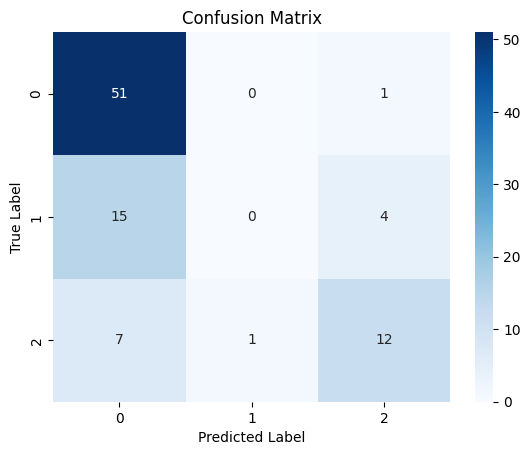

{'None': 0.6923076923076923,
 'Standardized': 0.6923076923076923,
 'Normalized': 0.6923076923076923}

In [18]:
from sklearn.linear_model import RidgeClassifier
process(RidgeClassifier())

## Gaussian Process Classifier

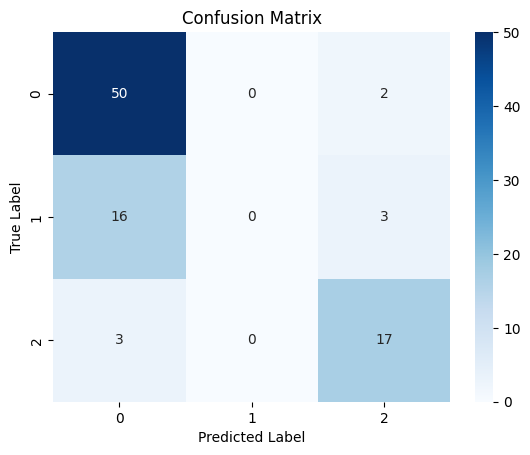

{'None': 0.7582417582417582,
 'Standardized': 0.7362637362637363,
 'Normalized': 0.7362637362637363}

In [19]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

x_train, x_test, y_train, y_test = preprocessing(standardize=True)

kernel = 1.0 * RBF(1.0)

process(GaussianProcessClassifier(kernel=kernel, random_state=0))

## Multilayer Perceptron

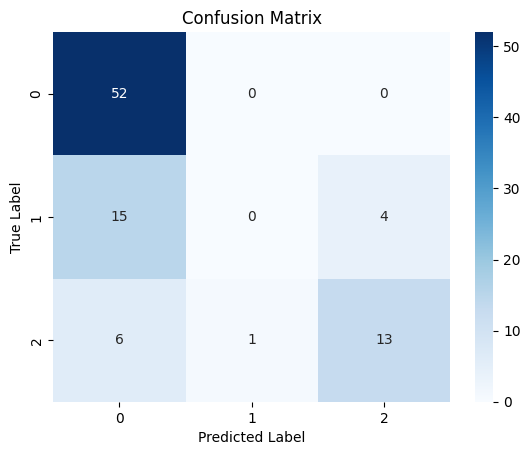

{'None': 0.7252747252747253,
 'Standardized': 0.7472527472527473,
 'Normalized': 0.7142857142857143}

In [20]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
process(MLPClassifier(random_state=0, max_iter=84))

Text(0.5, 0, 'Number of Components')

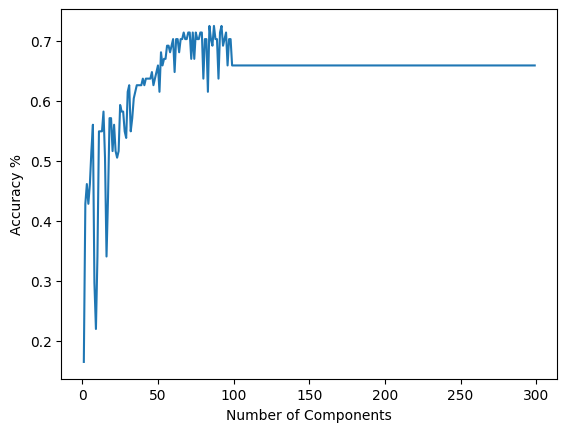

In [21]:
# Optimzation
scores = []

for i in range(1,300):
  scores.append(process(MLPClassifier(random_state=0, max_iter=i), False))

import matplotlib.pyplot as plt

plt.plot(range(1,300), scores)
plt.ylabel("Accuracy %")
plt.xlabel("Number of Components")

In [22]:
print(f"Number of Iterations: {scores.index(max(scores))+1} with Accuracy: {max(scores)}")

Number of Iterations: 84 with Accuracy: 0.7252747252747253
